# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('clustered_data_gym.csv')
df.head()

,Unnamed: 0,Age,Weight (kg),Height (m),Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender,Max_BPM,Workout_Type,Kelas GYM,Cluster
0,0,-0.035152,1.091571,0.994106,0.384736,1.266059,-0.731206,-0.984101,-1.841483,-0.438060,1.782195,0.223870,-0.895092,Female,174,Strength,1,Frekuensi olahraga tinggi dan mahir
1,1,-0.688302,0.982713,0.749147,0.648923,1.139167,-1.056193,-0.613287,0.747444,0.129169,1.782195,0.223870,2.488533,Female,166,Strength,1,Frekuensi olahraga tinggi dan mahir
2,2,-1.014877,-0.100423,0.912453,1.309388,-0.002864,-0.406219,1.976278,0.884605,-1.147097,-0.354955,0.223870,-1.173827,Male,187,Cardio,0,Frekuensi olahraga rendah dan pemula
3,3,1.597722,0.471081,0.667494,1.507528,-0.764218,0.162509,-1.241525,1.416107,-0.438060,0.713620,-1.138269,0.173978,Female,187,Cardio,4,Frekuensi olahraga tinggi dan menengah
4,4,-0.035152,-0.753570,0.014270,1.507528,0.250921,0.568744,0.774965,0.490266,0.696399,0.713620,0.223870,0.255129,Female,177,Strength,1,Frekuensi olahraga tinggi dan mahir


<ipython-input-3-e59b55eac3c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kelas GYM', data=df, palette='viridis')


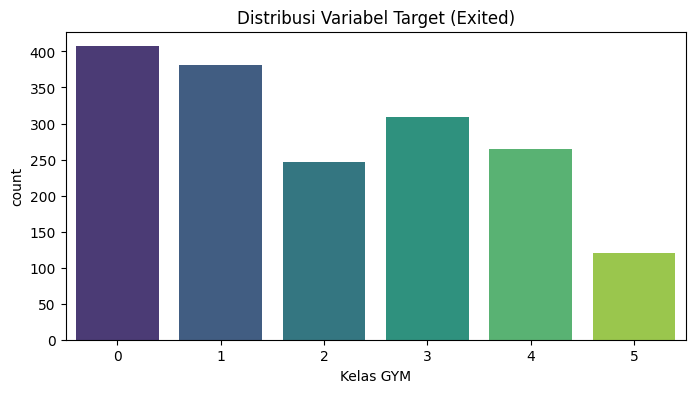

In [3]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Kelas GYM', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (Exited)')
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Kelas GYM'])
y = df['Kelas GYM']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1382, 17), y_train=(1382,)
Test set shape: X_test=(346, 17), y_test=(346,)


In [5]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Encoding target label
y_train = le.fit_transform(y_train)  # Menggunakan fit_transform untuk data training
y_test = le.transform(y_test)       # Menggunakan transform untuk data testing

In [6]:
print(X_train['Cluster'].unique())
print(X_test['Cluster'].unique())

['Frekuensi olahraga rendah dan pemula'
 'Frekuensi olahraga rendah dan menengah'
 'Frekuensi olahraga sedang dan menengah'
 'Frekuensi olahraga tinggi dan mahir'
 'Frekuensi olahraga tinggi dan menengah'
 'Frekuensi olahraga sedang dan pemula']
['Frekuensi olahraga rendah dan pemula'
 'Frekuensi olahraga rendah dan menengah'
 'Frekuensi olahraga sedang dan menengah'
 'Frekuensi olahraga sedang dan pemula'
 'Frekuensi olahraga tinggi dan menengah'
 'Frekuensi olahraga tinggi dan mahir']


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. Memisahkan fitur dan target
X = df.drop(columns=['Cluster', 'Unnamed: 0'])  # Drop target dan indeks
y = df['Cluster']

# 2. Encoding target label
le = LabelEncoder()
y = le.fit_transform(y)

# 3. Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Menentukan kolom numerik dan kategori
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 5. Pipeline preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),   # Standarisasi fitur numerik
        ('cat', OneHotEncoder(), categorical_features) # Encoding fitur kategori
    ])

# 6. Pipeline model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 7. Melatih model
pipeline.fit(X_train, y_train)

# 8. Evaluasi model
y_pred = pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 9. Menampilkan mapping LabelEncoder
print("Mapping LabelEncoder:", dict(zip(le.classes_, le.transform(le.classes_))))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        66
           5       1.00      1.00      1.00        58

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346

Confusion Matrix:
 [[67  0  0  0  0  0]
 [ 0 90  0  0  0  0]
 [ 0  0 44  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 66  0]
 [ 0  0  0  0  0 58]]
Mapping LabelEncoder: {'Frekuensi olahraga rendah dan menengah': 0, 'Frekuensi olahraga rendah dan pemula': 1, 'Frekuensi olahraga sedang dan menengah': 2, 'Frekuensi olahraga sedang dan pemula': 3, 'Frekuensi olahraga tinggi dan mahir': 4, 'Frekuensi olahraga tinggi dan menengah': 5}


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluasi model
y_pred = pipeline.predict(X_test)

# Metrik performa
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        66
           5       1.00      1.00      1.00        58

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346

Confusion Matrix:
 [[67  0  0  0  0  0]
 [ 0 90  0  0  0  0]
 [ 0  0 44  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 66  0]
 [ 0  0  0  0  0 58]]
Accuracy: 1.0


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [12]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Hyperparameter yang akan diuji
param_dist = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30, 40],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=50,  # Jumlah iterasi pencarian
    cv=5,  # Cross-validation dengan 5 fold
    scoring='f1_weighted',  # Fokus pada F1-score
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Cari parameter terbaik
random_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluasi model terbaik
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 10, 'classifier__bootstrap': False}
Best Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        66
           5       1.00      1.00      1.00        58

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346



## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [13]:
# Prediksi data testing dengan model terbaik
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report

# Evaluasi performa model
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        66
           5       1.00      1.00      1.00        58

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346



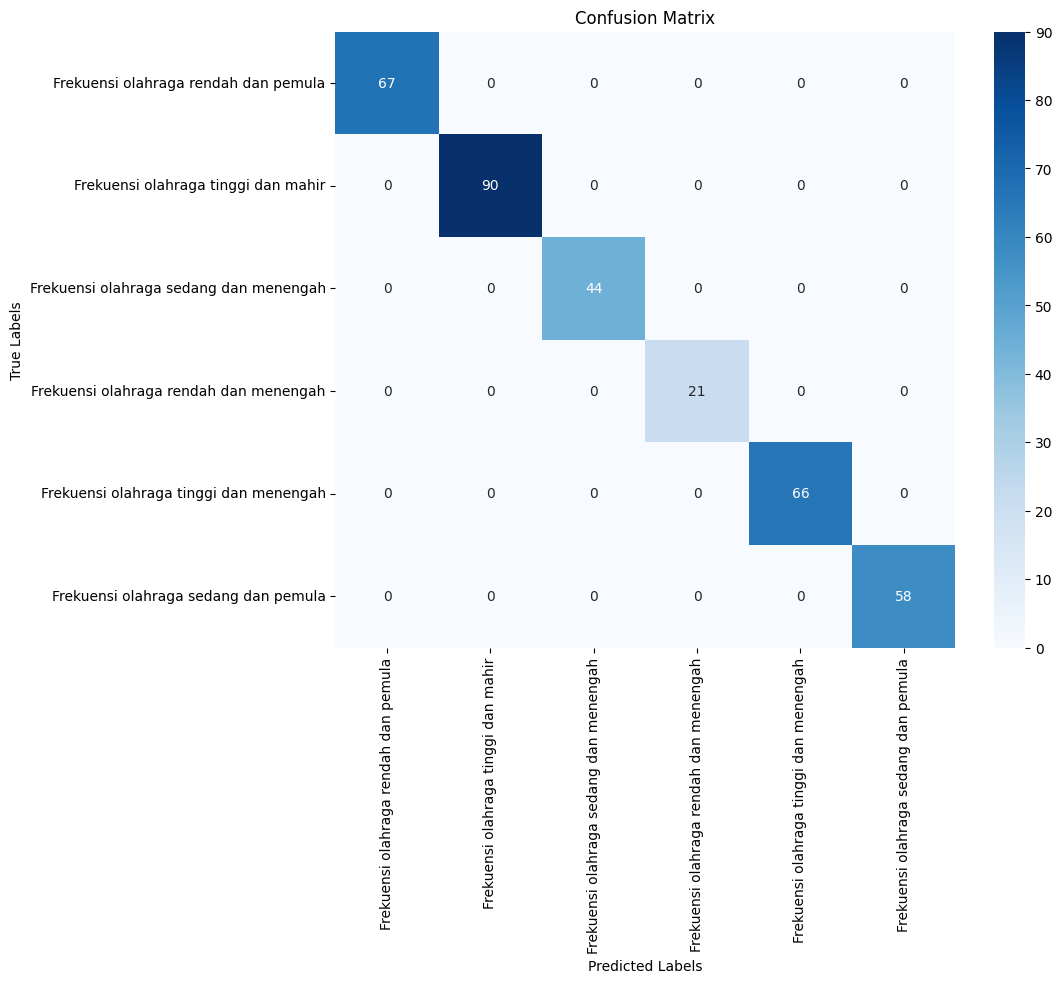

In [15]:
# Label names dictionary
label_names = {
    0: "Frekuensi olahraga rendah dan pemula",
    1: "Frekuensi olahraga tinggi dan mahir",
    2: "Frekuensi olahraga sedang dan menengah",
    3: "Frekuensi olahraga rendah dan menengah",
    4: "Frekuensi olahraga tinggi dan menengah",
    5: "Frekuensi olahraga sedang dan pemula",
}

# Mengambil nama label berdasarkan key
label_names_list = [label_names[i] for i in range(len(label_names))]

# Import the necessary library if you haven't already
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Assuming y_test and y_pred are defined

# Visualisasi confusion matrix dengan label names
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names_list, yticklabels=label_names_list)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-16-9a31cc5f3e61>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kelas GYM', data=df, palette='viridis')


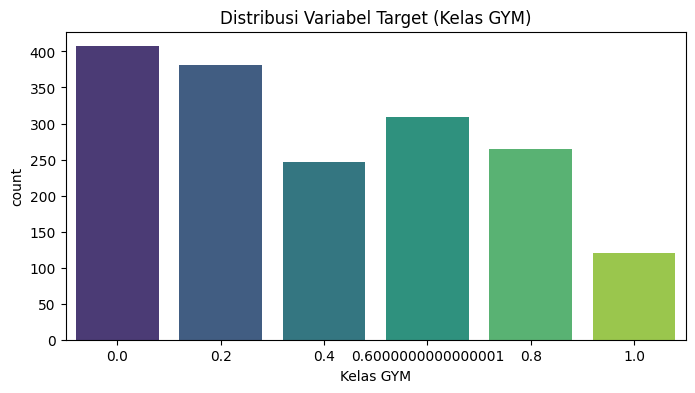

In [16]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Kelas GYM', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (Kelas GYM)')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

1. Perbandingan Evaluasi Model

Sebelum Tuning

Akurasi: 1.00 (100%)
Precision, Recall, dan F1-score: 1.00 untuk semua kelas.

Setelah Tuning

Akurasi: 1.00 (100%)
Precision, Recall, dan F1-score: Tetap 1.00 di semua kelas.

2. Identifikasi Kelemahan Model

Berdasarkan hasil evaluasi, tidak ada perbedaan performa model sebelum dan sesudah tuning.
Model sudah mencapai akurasi sempurna (1.00) pada data uji, bahkan sebelum tuning dilakukan.

Ketika akurasi model mencapai 100%, kemungkinan besar model mengalami overfitting, artinya performa di data uji terlalu sempurna. Ini bisa terjadi jika data uji memiliki pola yang sama dengan data latih atau jika data tidak cukup beragam.
Walaupun performanya bagus, perlu dicek lebih lanjut apakah ini dapat direplikasi di data lain.

Untuk saat ini precision dan recall sempurna di semua kelas (nilai = 1.00). Artinya, tidak ada indikasi ketidakseimbangan performa antar kelas.

Identifikasi Kelemahan Model

Nilai evaluasi yang "terlalu sempurna" kemungkinan disebabkan oleh data yang terlalu mudah dikenali atau model yang terlalu kompleks (misal n_estimators besar dan kedalaman pohon tinggi).

Jika dataset kecil atau homogen, model akan mudah mempelajari pola tanpa tantangan yang signifikan.

3. Tambahkan data baru yang lebih beragam atau gunakan data augmentasi untuk menantang model lebih lanjut.

Model lain seperti XGBoost, LightGBM, atau SVM dapat dicoba untuk dibandingkan performanya dan memeriksa kestabilan model.

Tambahkan regularisasi atau atur parameter seperti kedalaman pohon (max_depth) dan ukuran sampel (min_samples_split).

